## Import the libraries needed for the below code

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 1. Data Exploration:

## <a id='toc1_4_1_'></a>[Step 1.1: Load the dataset](#toc0_)
 We load the advertising dataset, which contains features related to advertising expenditures (TV, Radio, Newspaper) and sales.

In [6]:
# Step 1: Data Loading and Exploration
# Load the dataset (Assuming the CSV file is in the current directory)
advertising_df = pd.read_csv('C:/Users/Abhijith Nallana/Downloads/advertising.csv')
advertising_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Checking for any missing values in the dataset
A check for missing values is conducted to ensure data integrity, which is crucial for accurate modeling.

In [7]:
# Checking for missing values to ensure data integrity
print("\nChecking for Missing Values:")
print(advertising_df.isnull().sum())


Checking for Missing Values:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


## <a id='toc1_4_1_'></a>[Step 1.2: Visualizations:](#toc0_)
We use scatter plots, correlation matrices, and scatterplot matrices to assess relationships between variables.

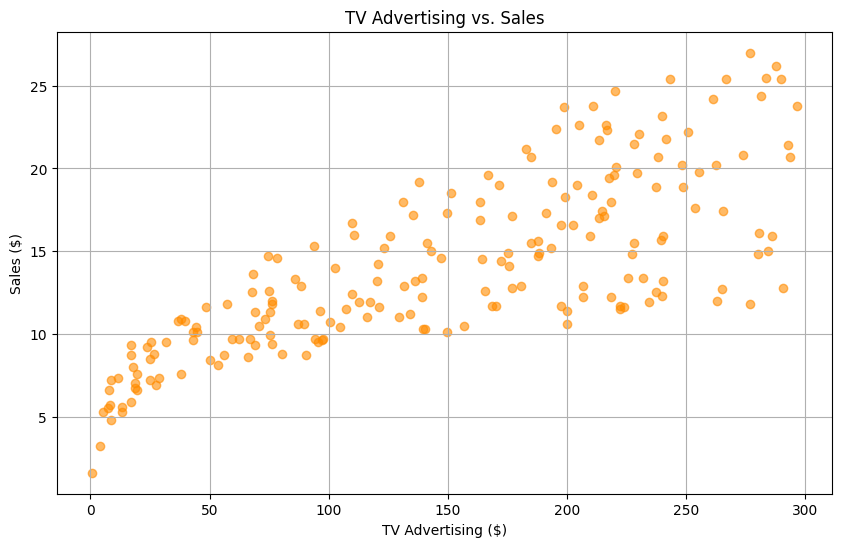

In [33]:
# Scatterplot Visualization
plt.figure(figsize=(10, 6))
plt.scatter(advertising_df['TV'], advertising_df['Sales'], color='darkorange', alpha=0.6)
plt.title('TV Advertising vs. Sales')
plt.xlabel('TV Advertising ($)')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.show()

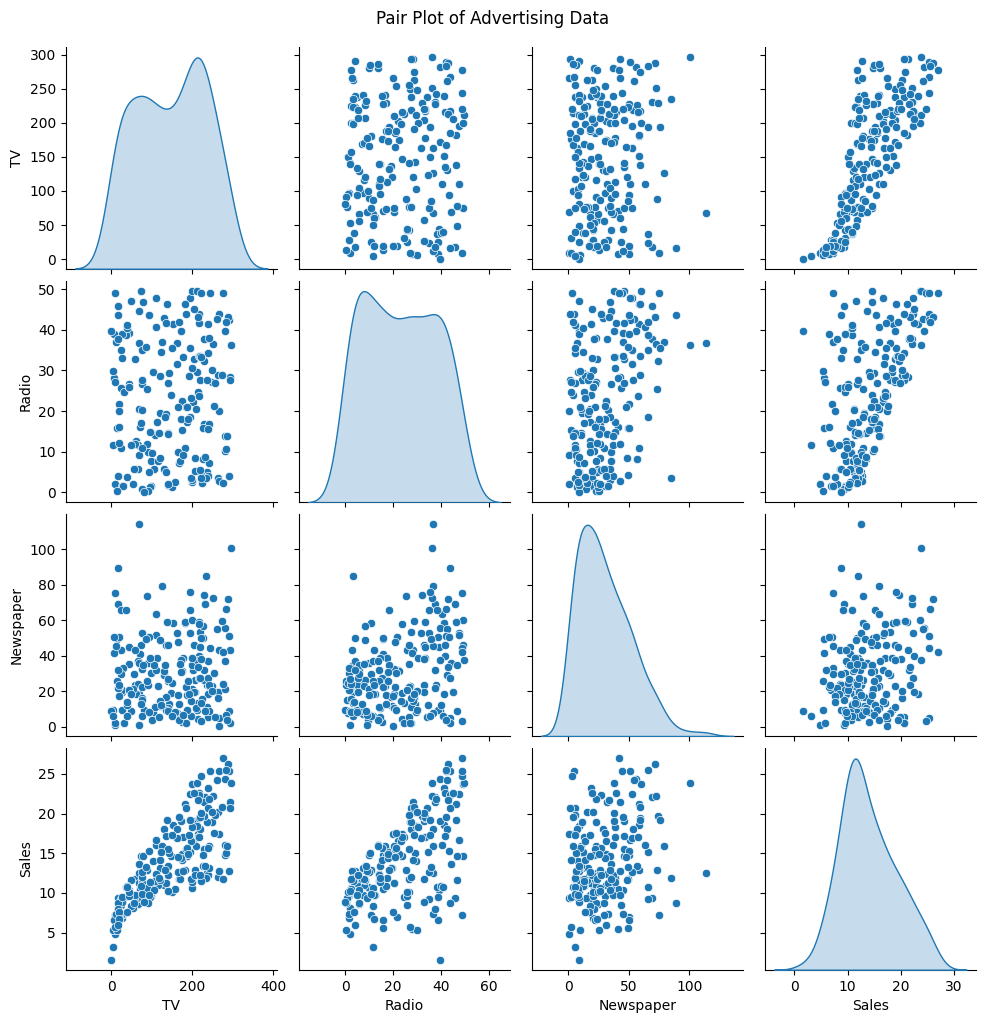

In [10]:
# Scatter plot matrix to visually inspect relationships between different advertising media and sales
sns.pairplot(advertising_df[['TV', 'Radio', 'Newspaper', 'Sales']], diag_kind='kde')
plt.suptitle("Pair Plot of Advertising Data", y=1.02)
plt.show()

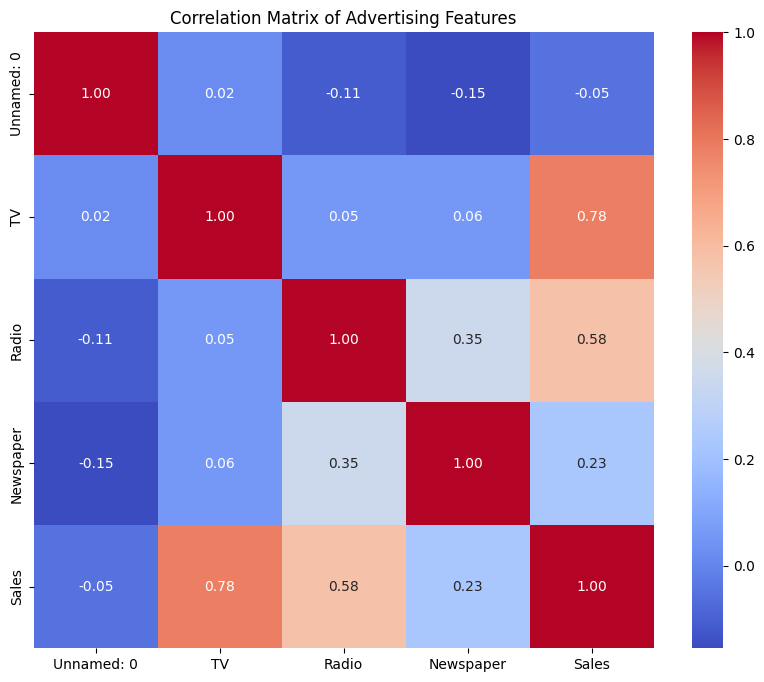

In [8]:
# Visualizing the correlation between features using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(advertising_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Advertising Features")
plt.show()


## Model Development: K-Nearest Neighbors (25 points)
The KNN model is implemented as a regression technique to predict sales based on advertising expenditures.

# - Feature Selection: The features selected for the KNN model are TV, Radio, and Newspaper expenditures.

In [13]:
# Step 2: Implementing KNN Regression Model
# Selecting features and target variable based on initial analysis
features = ['TV', 'Radio', 'Newspaper']
target = 'Sales'
X = advertising_df[features]
y = advertising_df[target]

# - Data Splitting: The dataset is split into training and testing sets to evaluate model performance effectively.

In [14]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# - Feature Normalization: KNN is sensitive to the scale of the data, so features are standardized using StandardScaler.

In [15]:
# Normalizing the features for the KNN model
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# - Hyperparameter Tuning: Using GridSearchCV, the optimal number of neighbors (K) is determined by evaluating performance across a range of values.

In [17]:
# Using GridSearchCV to find the best K value for KNN
knn_model = KNeighborsRegressor()
knn_param_grid = {'n_neighbors': range(3, 15)}
grid_search_knn = GridSearchCV(knn_model, knn_param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_knn.fit(X_train_normalized, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(3, 15)},
             scoring='neg_mean_squared_error')

# - Model Training: The KNN model is trained using the optimized K value, and predictions are made on the test set.

In [18]:
# Finding the optimal K value
optimal_k = grid_search_knn.best_params_['n_neighbors']
knn_optimized = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimized.fit(X_train_normalized, y_train)

KNeighborsRegressor(n_neighbors=4)

# - Performance Evaluation: The model's performance is quantified using Root Mean Squared Error (RMSE), and actual vs. predicted values are plotted for visual assessment.

In [19]:
# Predicting sales with the KNN model
y_pred_knn = knn_optimized.predict(X_test_normalized)
knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f"KNN Model (Optimal K = {optimal_k}): RMSE = {knn_rmse}")

KNN Model (Optimal K = 4): RMSE = 1.573236446522476


# - Visualization 

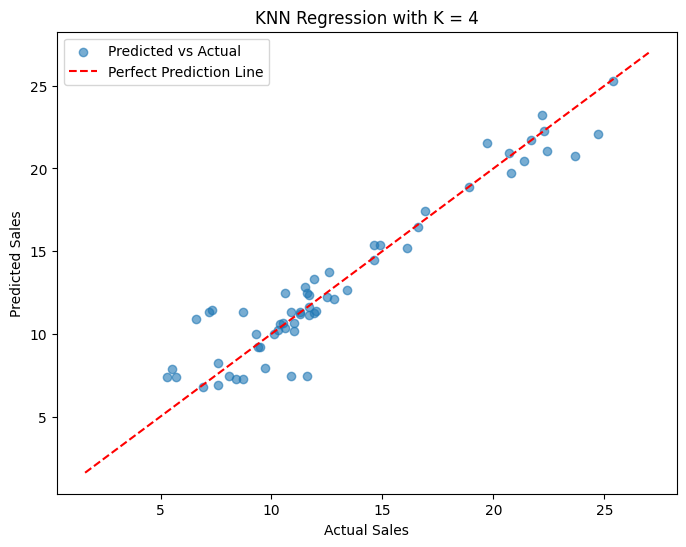

In [20]:
# Visualizing actual vs predicted sales values using KNN
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.6, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction Line')
plt.title(f"KNN Regression with K = {optimal_k}")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend()
plt.show()

## Model Development: Linear Regression
Following KNN, a Linear Regression model is developed using the same dataset.

# - Model Implementation: The Linear Regression model is trained on the same features and target variable.

In [21]:
# Step 3: Linear Regression Model Development
# Implementing Linear Regression
sales_linear_model = LinearRegression()
sales_linear_model.fit(X_train_normalized, y_train)

LinearRegression()

# - Performance Metrics:
RMSE is calculated to evaluate the model's accuracy, and actual vs. predicted sales are visualized to assess the fit.

In [22]:
# Predicting sales using Linear Regression
y_pred_linear = sales_linear_model.predict(X_test_normalized)
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f"Linear Regression Model RMSE: {linear_rmse}")

Linear Regression Model RMSE: 1.9485372043446394


# - Comparison with KNN:
The performance of Linear Regression is compared with that of the KNN model, allowing for an analysis of strengths and weaknesses inherent to both approaches.

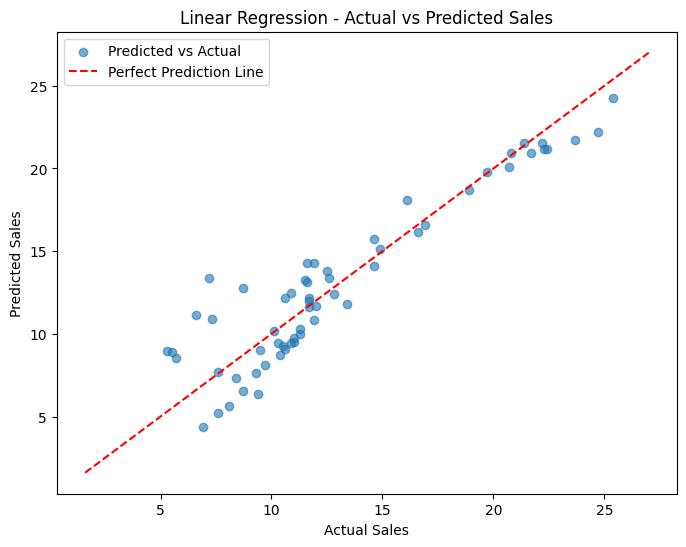

In [23]:
# Visualizing actual vs predicted sales values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.6, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction Line')
plt.title("Linear Regression - Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend()
plt.show()

In [ ]:
Polynomial Transformation: A polynomial feature transformer is applied to the original features, allowing for the modeling of nonlinear relationships.
Sine Transformation: Sine transformations are applied to the normalized features to capture periodic patterns that may influence sales.
Model Fitting: Both transformed datasets are used to fit separate Linear Regression models.
Performance Comparison: The RMSE for the transformed models is compared with that of the original models, highlighting the benefits of feature engineering in improving model performance.

In [24]:
# Step 4: Polynomial and Sine Transformations
# Applying a Polynomial Transformation of degree 2
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_transformer.fit_transform(X_train_normalized)
X_test_poly = poly_transformer.transform(X_test_normalized)

# - Model Fitting: 
Both transformed datasets are used to fit separate Linear Regression models.

In [25]:
# Fitting the Polynomial Transformed Linear Regression model
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)

LinearRegression()

# - Performance Comparison:
The RMSE for the transformed models is compared with that of the original models, highlighting the benefits of feature engineering in improving model performance.

In [26]:
# Predicting with the polynomial model
y_pred_poly = poly_regressor.predict(X_test_poly)
poly_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print(f"Polynomial Transformed Linear Regression RMSE: {poly_rmse}")

Polynomial Transformed Linear Regression RMSE: 0.7233218473857446


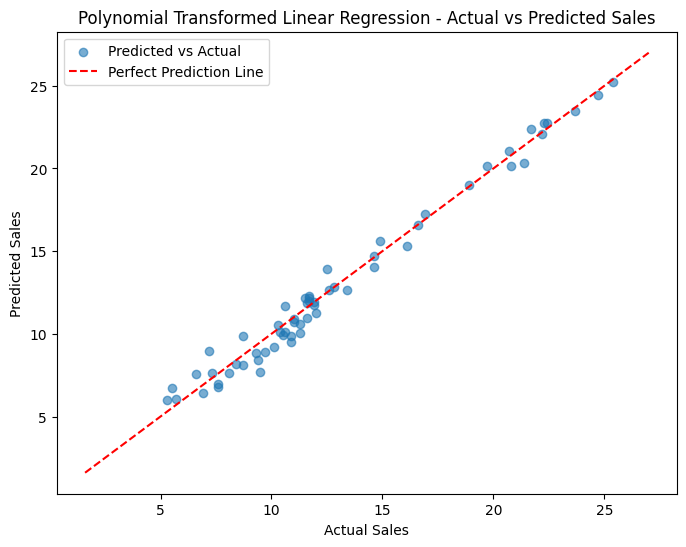

In [27]:
# Visualizing actual vs predicted values for Polynomial Transformation
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.6, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction Line')
plt.title("Polynomial Transformed Linear Regression - Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend()
plt.show()

In [28]:
# Applying a sine transformation
X_train_sine = np.sin(X_train_normalized)
X_test_sine = np.sin(X_test_normalized)

In [29]:
# Fitting Linear Regression with sine-transformed features
sine_regressor = LinearRegression()
sine_regressor.fit(X_train_sine, y_train)

LinearRegression()

In [30]:
# Predicting with the sine-transformed model
y_pred_sine = sine_regressor.predict(X_test_sine)
sine_rmse = np.sqrt(mean_squared_error(y_test, y_pred_sine))
print(f"Sine Transformed Linear Regression RMSE: {sine_rmse}")

Sine Transformed Linear Regression RMSE: 2.5055498902785853


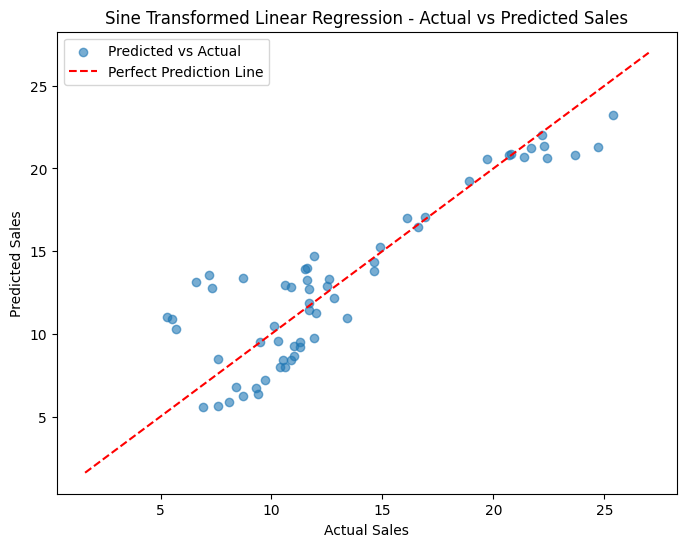

In [31]:
# Visualizing actual vs predicted values for the Sine Transformed model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_sine, alpha=0.6, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction Line')
plt.title("Sine Transformed Linear Regression - Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend()
plt.show()

In [32]:
# Step 5: Evaluation and Reflection
print("\n### Model Evaluation and Comparison ###")
print(f"KNN Model RMSE (Optimal K={optimal_k}): {knn_rmse}")
print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Polynomial Transformed Linear Regression RMSE: {poly_rmse}")
print(f"Sine Transformed Linear Regression RMSE: {sine_rmse}")


### Model Evaluation and Comparison ###
KNN Model RMSE (Optimal K=4): 1.573236446522476
Linear Regression RMSE: 1.9485372043446394
Polynomial Transformed Linear Regression RMSE: 0.7233218473857446
Sine Transformed Linear Regression RMSE: 2.5055498902785853


# Conclusion

This assignment serves as a comprehensive demonstration of modeling techniques in data science, emphasizing the importance of data exploration, model evaluation, and feature engineering. By systematically comparing KNN and Linear Regression, and applying transformations, the assignment illustrates how different approaches can lead to varying results, ultimately contributing to a deeper understanding of the modeling process in predictive analytics.